## clustring Machine Learning

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("/Users/user/Desktop/AI_tasks/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, 'petal_length')

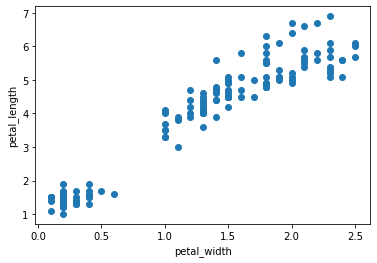

In [3]:
plt.scatter(df.petal_width,df.petal_length)
plt.xlabel('petal_width')
plt.ylabel('petal_length')

No handles with labels found to put in legend.


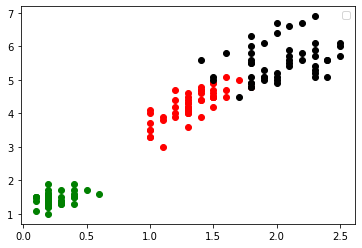

In [15]:
df1 = df[df.species=='Iris-setosa']
df2 = df[df.species=='Iris-versicolor']
df3 = df[df.species=='Iris-virginica']
plt.scatter(df1.petal_width,df1.petal_length,color='green')
plt.scatter(df2.petal_width,df2.petal_length,color='red')
plt.scatter(df3.petal_width,df3.petal_length,color='black')
plt.legend()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


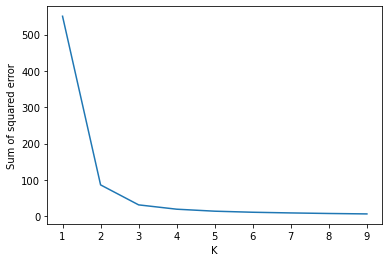

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_width','petal_length']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### best cluster is 3 groups

In [6]:
# Normalization
scaler = MinMaxScaler()


scaler.fit(df[['petal_width']])
df['petal_width'] = scaler.transform(df[['petal_width']])

scaler.fit(df[['petal_length']])
df['petal_length'] = scaler.transform(df[['petal_length']])

In [10]:
df=df.drop(['species','sepal_length','sepal_width'],axis='columns')
df.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal_width','petal_length']])
df['cluster']=y_predicted
df

,petal_length,petal_width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


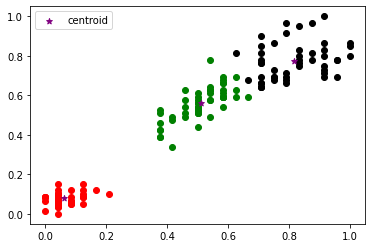

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.petal_width,df1.petal_length,color='green')
plt.scatter(df2.petal_width,df2.petal_length,color='red')
plt.scatter(df3.petal_width,df3.petal_length,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()